In [1]:
# This is the file for assignment 3
import pandas as pd
import numpy as np
import os
import random
import matplotlib
import matplotlib.pyplot as plt

In [2]:
reviewing = pd.read_json('reviews.json')

In [4]:
# by the time I scrapped(4/13/2018), there were 842 match reviews
reviewing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 99
Data columns (total 5 columns):
author         842 non-null object
date           842 non-null datetime64[ns]
rating         842 non-null int64
review_text    842 non-null object
title          842 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.5+ KB


In [5]:
reviewing.head()

,author,date,rating,review_text,title
0,FATMAN,2018-04-13,1,Junk junk junk sums it up,Do not waste your money
1,CS McCulloh,2018-04-13,5,Really good for the price.,Five Stars
10,Cwazy Wabbit,2018-04-11,5,"Very nice, works great",Five Stars
100,William Vuzzo,2018-03-18,5,These are great for work. Get the upgraded bat...,Five Stars
101,Harris,2018-03-17,5,These flashlights are so valuable and they are...,These flashlights are so valuable and they are...


In [6]:
# 2 character name may be the spammer, lets find out what rating they made
reviewing['namelen'] = reviewing.author.apply(lambda r: len(r))
reviewing.rating.loc[reviewing.namelen == 2 ].value_counts()

5    18
1     3
3     1
Name: rating, dtype: int64

In [7]:
# WOW!, basically 5 stars, let's remove them
review = reviewing[reviewing.namelen != 2]
# now, let's extract some feature and do some EDA, the feature are 1: the lenth of title 2: the lenth of text 3: positive_rate 4: negactive rate

In [8]:
review['titlen'] = review.title.apply(lambda r: len(r.split()))
review['revlen'] = review.review_text.apply(lambda r: len(r.split()))
review.titlen.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2     355
3      96
4      71
5      53
6      44
1      39
11     29
10     28
7      27
8      22
9      20
13     14
12      9
14      5
18      3
15      2
20      1
19      1
27      1
Name: titlen, dtype: int64

In [9]:
#the title length whose length above 12 is rare, let's set them to 12
review.loc[review['titlen'] > 11,'titlen'] = 12
review.titlen.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2     355
3      96
4      71
5      53
6      44
1      39
12     36
11     29
10     28
7      27
8      22
9      20
Name: titlen, dtype: int64

In [10]:
# now, sentiment analysis
import spacy
import string
import csv
nlp = spacy.load('en')
f = open("positive-words.txt",'r')
positive_words=[line.strip() for line in f]
fy = open("negative-words.txt",'r')
negative_words=[line.strip() for line in fy]
def po_analysis(str1):
    analysis_tokens=[]
    tokens = []
    count_p=0
    count_n=0
    w = nlp(str1)
    for t in w:
        tokens.append(t.lemma_)
    analysis_tokens = [e for e in tokens if e not in [',','.','!','~','-PRON-']]
    for word in analysis_tokens:
        if word in positive_words:
            count_p+=1
    return float(count_p)/len(analysis_tokens)

def neg_analysis(str1):
    analysis_tokens=[]
    tokens = []
    count_p=0
    count_n=0
    w = nlp(str1)
    for t in w:
        tokens.append(t.lemma_)
    analysis_tokens = [e for e in tokens if e not in [',','.','!','~','-PRON-']]
    for word in analysis_tokens:
        if word in negative_words:
            count_n+=1
    return float(count_n)/len(analysis_tokens)
# reset the index
review = review.reset_index(drop=True)
for i in range(len(review)):
    review.loc[i,'pos'] = po_analysis(review.loc[i,'review_text'])
    review.loc[i,'neg'] = neg_analysis(review.loc[i,'review_text'])
    
# now the df is like this:
review.head()

,author,date,rating,review_text,title,namelen,titlen,revlen,pos,neg
0,FATMAN,2018-04-13,1,Junk junk junk sums it up,Do not waste your money,6,5,6,0.000000,0.600000
1,CS McCulloh,2018-04-13,5,Really good for the price.,Five Stars,11,2,5,0.200000,0.000000
2,Cwazy Wabbit,2018-04-11,5,"Very nice, works great",Five Stars,12,2,4,0.750000,0.000000
3,William Vuzzo,2018-03-18,5,These are great for work. Get the upgraded bat...,Five Stars,13,2,9,0.222222,0.000000
4,Harris,2018-03-17,5,These flashlights are so valuable and they are...,These flashlights are so valuable and they are...,6,12,31,0.137931,0.034483


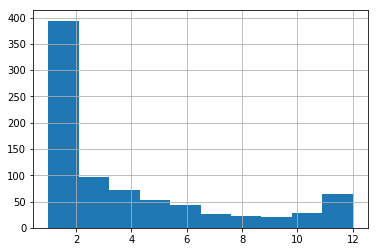

In [11]:
#let's figure out which features are most related to rating 
%matplotlib inline
review['titlen'].hist()

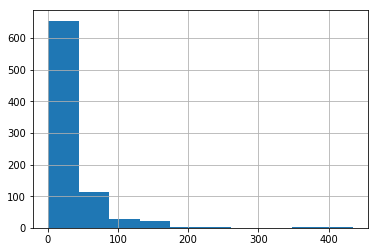

In [12]:
review['revlen'].hist()

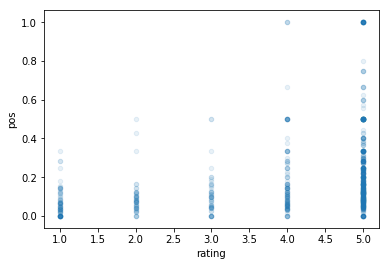

In [14]:
review.plot(kind = 'scatter', x = 'rating', y = 'pos',alpha=0.1)

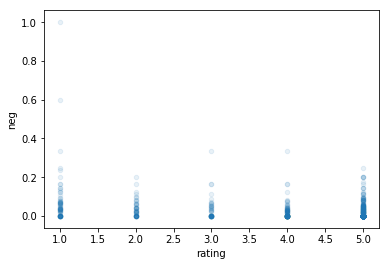

In [15]:
review.plot(kind = 'scatter', x = 'rating', y = 'neg',alpha=0.1)

In [16]:
# use corr() to see something
corr_matrix = review.corr()
corr_matrix["rating"].sort_values(ascending=False)

rating     1.000000
pos        0.306215
namelen    0.065581
revlen    -0.073436
titlen    -0.163680
neg       -0.287784
Name: rating, dtype: float64

In [18]:
# from above EDA, I choose use 'pos','neg','titlen', of course and text  as 4 feature that I am gonna use to build model
# now,let's make train set and test set, I prefer 9:1 or 4:1, since I have so many data, 9:1 it is 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(review, test_size=0.1, random_state=77)
len(train_set)
train_set.head()

,author,date,rating,review_text,title,namelen,titlen,revlen,pos,neg
757,DBK_Cali,2017-03-11,5,Super bright little flashlights. The focus on ...,Super bright little lights that work well.,8,7,143,0.120000,0.024000
51,Brett Wilson,2018-01-14,4,Super cheap. These are kind of our tiny emerge...,"Small, cheap flashlights but thats what we pai...",12,10,40,0.105263,0.052632
517,Amazon Customer,2017-07-04,5,Best damn little 5 buck flashlight for EDC I l...,Best damn little 5 buck flashlight for EDC I l...,15,11,99,0.052632,0.021053
514,hellokitty,2017-07-05,5,these lights work great nice and bright good t...,good deal work great and seem very durable thx,10,9,15,0.333333,0.000000
774,Charles J. Cole,2017-03-04,5,This is probably the best and most compact set...,Very fast shipping!,15,3,40,0.128205,0.025641


In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


In [22]:
#text filter
stop_words = {'computer', 'sun', 'user', 'week','flash','flashlight','light','day','deliver','ups','post'}
class reviewtextFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences
cv = CountVectorizer(lowercase=True, stop_words='english')

In [23]:
# I need a selector to give me the data I need
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class textFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [24]:
# build several pipelines, this is important
num_attribs = ['pos','neg','titlen']
text_attribs = 'review_text'
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

text_pipeline = Pipeline([
        ('selector', textFrameSelector(text_attribs)),
        ('posf',reviewtextFilter(stop_words=stop_words)),
        ('cv', CountVectorizer(lowercase=True, stop_words='english'))
    ])
# now these 4 features need to union together
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('text_pipeline', text_pipeline),])

In [25]:
#process train set
train_labels = train_set.rating
review_prepared = full_pipeline.fit_transform(train_set)
review_prepared

<738x1451 sparse matrix of type '<class 'numpy.float64'>'
	with 9397 stored elements in Compressed Sparse Row format>

In [26]:
text_processed = text_pipeline.fit_transform(train_set)
text_processed

<738x1448 sparse matrix of type '<class 'numpy.int64'>'
	with 7183 stored elements in Compressed Sparse Row format>

In [27]:
#text: 738*1448 text with num_feature: 738*1451. exactly what I want!!
# now, build and tarin some model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(review_prepared, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=62)
forest_reg.fit(review_prepared, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=62, verbose=0, warm_start=False)

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(review_prepared, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# now there are 3 models, try something
training_test = test_set.sample(10, random_state=51)
training_test_labels = training_test.rating
proc_training_test = full_pipeline.transform(training_test)
lr.predict(proc_training_test)

array([5, 5, 4, 1, 4, 5, 1, 5, 5, 5], dtype=int64)

In [31]:
training_test_labels

205    5
348    5
625    4
310    1
734    5
611    5
548    1
272    5
312    5
762    5
Name: rating, dtype: int64

In [33]:
lr.score(proc_training_test, training_test_labels)

0.90000000000000002

In [34]:
#not bad ha, lets use cross validation to test them.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, review_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lr_rmse_scores)

Scores: [ 1.14707867  1.08215185  0.95971487  1.14490646  1.07269983  1.26057173
  1.34978436  1.17624897  1.22474487  1.21335165]
Mean: 1.16312532697
Standard deviation: 0.103695702337


In [35]:
lin_scores = cross_val_score(lin_reg,  review_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 4.62852738  3.53627272  3.77981776  4.48985611  4.98950435  2.76622246
  3.90667682  2.9086903   4.52998428  4.02183922]
Mean: 3.95573914138
Standard deviation: 0.697229580226


In [36]:
forest_scores = cross_val_score(forest_reg,  review_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 1.16761506  1.08461117  0.93563102  1.18401516  0.92144129  1.1193091
  1.0464014   0.99479124  1.17040212  1.29544924]
Mean: 1.09196667963
Standard deviation: 0.112957332609


In [37]:
# it seems like both randomforest and logistic regreesion are good, let do some fine-tune to set them to best parameter
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 16 (4×4) combinations of hyperparameters
    {'n_estimators': [5, 20, 10, 50], 'max_features': [2, 4, 'log2', 'sqrt']},
    # then try 12 (3×4) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 'log2', 'sqrt']},
  ]

forest_reg = RandomForestRegressor(random_state=62)
# train across 5 folds, we have about 700 case, split them to 5 folds should good enough
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(review_prepared, train_labels)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=62, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [5, 20, 10, 50], 'max_features': [2, 4, 'log2', 'sqrt']}, {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4, 'log2', 'sqrt']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [38]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=62, verbose=0, warm_start=False)

In [39]:
# let's build a better randomforest
forest_reg_premium =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=62, verbose=0, warm_start=False)
forest_reg_premium.fit(review_prepared, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=62, verbose=0, warm_start=False)

In [41]:
# lets see how it works
forest_scores_p = cross_val_score(forest_reg_premium,  review_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores_p = np.sqrt(-forest_scores_p)
display_scores(forest_rmse_scores_p)

Scores: [ 1.02106899  1.052788    0.85807603  0.99447333  0.83633693  1.07629278
  0.97017581  0.93180538  1.06030963  1.19864461]
Mean: 0.999997147604
Standard deviation: 0.102296892808


In [45]:
# what about logistic?
param_grid2 = [
    {'penalty': ['l2'], 'C': [0.1, 1.0, 10,100]},
    {'penalty': ['l1'], 'C': [0.1, 1.0, 10,100]},
  ]

lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid2, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(review_prepared, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l2'], 'C': [0.1, 1.0, 10, 100]}, {'penalty': ['l1'], 'C': [0.1, 1.0, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
# let's build a better logistic:
lr_premium = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr_premium.fit(review_prepared, train_labels)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
scores_p = cross_val_score(lr_premium, review_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores_p = np.sqrt(-scores_p)
display_scores(lr_rmse_scores_p)

Scores: [ 1.11213403  1.01307245  1.10023921  1.29968811  1.17624897  1.31898674
  1.29804912  1.12261925  1.15470054  1.17260394]
Mean: 1.17683423582
Standard deviation: 0.095032467002


In [56]:
# based on the result,I think the randomforest model(forest_reg_premium) is the best, it has better accuracy and fair small deviation.